In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

iris = datasets.load_iris()
#need first two features from flowers
X = iris.data[:, :2]  
Y = iris.target

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, shuffle=True)
print("x train shape:", x_train.shape)
print("y train shape", y_train.shape)
print("x test shape:", x_test.shape)
print("y test shape:", y_test.shape)


regression = LogisticRegression(multi_class='multinomial')
# train the model on train dataset
regression.fit(x_train, y_train)


x train shape: (105, 2)
y train shape (105,)
x test shape: (45, 2)
y test shape: (45,)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

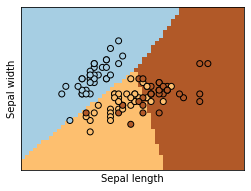

In [60]:
x_min, x_max = x_train[:, 0].min()-1, x_train[:, 0].max()+1 # x axis
y_min, y_max = x_train[:, 1].min()-1, x_train[:, 1].max()+1 # y axis

# plot the boundaries
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = regression.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot the training points
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

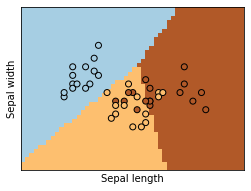

In [61]:
x_min2, x_max2 = x_test[:, 0].min()-1, x_test[:, 0].max()+1 # x axis
y_min2, y_max2 = x_test[:, 1].min()-1, x_test[:, 1].max()+1 # y axis

# plot the boundaries
xx2, yy2 = np.meshgrid(np.arange(x_min2, x_max2, 0.1), np.arange(y_min2, y_max2, 0.1))
Z2 = regression.predict(np.c_[xx2.ravel(), yy2.ravel()])

Z2 = Z2.reshape(xx2.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx2, yy2, Z2, cmap=plt.cm.Paired)

# Plot the training points
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx2.min(), xx2.max())
plt.ylim(yy2.min(), yy2.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [62]:
pred = regression.predict(x_train)
score = np.equal(pred, y_train).sum() / y_train.size
print("train set accuracy:", score)

train set accuracy: 0.8285714285714286


In [63]:
pred_test = regression.predict(x_test)
score_test = np.equal(pred_test, y_test).sum() / y_test.size
print("test set accuracy:", score_test)

test set accuracy: 0.8222222222222222


confustion matrix of train set 
 [[36  0  0]
 [ 0 27  9]
 [ 0  9 24]]
confustion matrix of test set 
 [[14  0  0]
 [ 0 11  3]
 [ 0  5 12]]


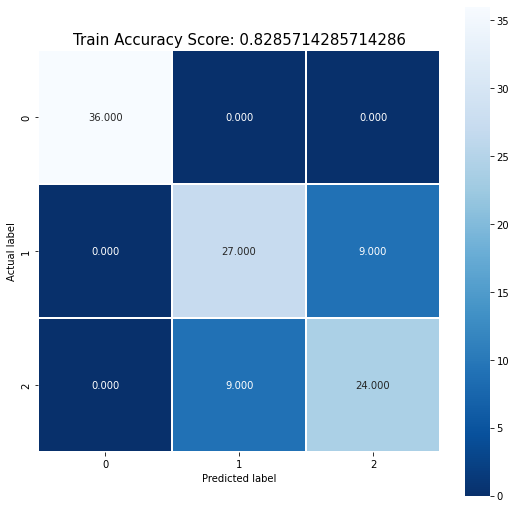

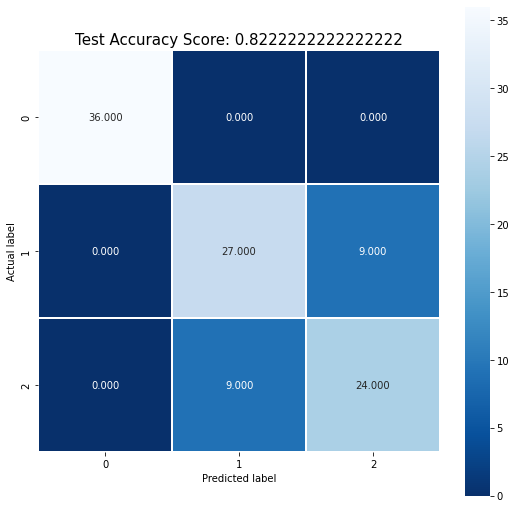

In [64]:
cm = metrics.confusion_matrix(y_train, pred)
print("confustion matrix of train set \n", cm)

cm_test = metrics.confusion_matrix(y_test, pred_test)
print("confustion matrix of test set \n", cm_test)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Train Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);


plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Test Accuracy Score: {0}'.format(score_test)
plt.title(all_sample_title, size = 15);